In [1]:
# import data manupulation library
import numpy as np
import pandas as pd
# import data visuvlaztion library
import matplotlib.pyplot as plt
import seaborn as sns
# import filter warings library
import warnings
warnings.filterwarnings('ignore')
# import logging
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s -%(levelname)s -%(message)s',
                    filemode ='w',
                    filename = 'model.log',force = True)
# import sci-kit learn libriries for model buliding 
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
# importing metrics for regression model 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
logging.info('Import Dataset For Model Bulding...')

In [3]:
url = 'https://raw.githubusercontent.com/bhagyashrii0806/CementPrediction_Model/refs/heads/main/Concrete_Data%20-%20Concrete_Data%20(1).csv'

df = pd.read_csv(url)

df.sample(frac = 1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
629,225.0,0.0,0.0,181.0,0.0,1113.0,833.0,7,11.17
504,491.0,26.0,123.0,201.0,3.9,822.0,699.0,3,29.55
930,159.0,209.0,161.0,201.0,7.0,848.0,669.0,28,30.88
282,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
653,102.0,153.0,0.0,192.0,0.0,887.0,942.0,90,25.46
...,...,...,...,...,...,...,...,...,...
854,287.0,121.0,94.0,188.0,9.0,904.0,696.0,28,41.94
718,122.6,183.9,0.0,203.5,0.0,958.2,800.1,7,10.35
584,228.0,342.1,0.0,185.7,0.0,955.8,674.3,7,21.92
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365,52.91


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
# checking data columns
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [7]:
import statsmodels.api as sm
X = df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ',axis =1)
y = df['Concrete compressive strength(MPa, megapascals) ']

In [8]:
X = sm.add_constant(X)

In [9]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.616
Model:                                                          OLS   Adj. R-squared:                  0.613
Method:                                               Least Squares   F-statistic:                     204.3
Date:                                              Thu, 05 Jun 2025   Prob (F-statistic):          6.29e-206
Time:                                                      20:25:42   Log-Likelihood:                -3869.0
No. Observations:                                              1030   AIC:                             7756.
Df Residuals:                                                  1021   BIC:                             7800.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement (component 1)(kg in a m^3 mixture)                 0.1198      0.008     14.113      0.000       0.103       0.136
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash (component 3)(kg in a m^3 mixture)                0.0879      0.013      6.988      0.000       0.063       0.113
Water  (component 4)(kg in a m^3 mixture)                -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2922      0.093      3.128      0.002       0.109       0.476
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0181      0.009      1.926      0.054      -0.000       0.037
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0202      0.011      1.887      0.059      -0.001       0.041
Age (day)                                                 0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# checking Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [11]:
# checking descriptive stats EDA'
# Univariate Analysis
from collections import OrderedDict
stats = []
for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurtosis()
        
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,Feature,Mean,Median,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,Cement (component 1)(kg in a m^3 mixture),281.167864,272.900,192.375,350.000,157.625,104.506364,0.509481,-0.520652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,73.895825,22.000,0.000,142.950,142.950,86.279342,0.800717,-0.508175
2,Fly Ash (component 3)(kg in a m^3 mixture),54.188350,0.000,0.000,118.300,118.300,63.997004,0.537354,-1.328746
3,Water (component 4)(kg in a m^3 mixture),181.567282,185.000,164.900,192.000,27.100,21.354219,0.074628,0.122082
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.204660,6.400,0.000,10.200,10.200,5.973841,0.907203,1.411269
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,972.918932,968.000,932.000,1029.400,97.400,77.753954,-0.040220,-0.599016
6,Fine Aggregate (component 7)(kg in a m^3 mixture),773.580485,779.500,730.950,824.000,93.050,80.175980,-0.253010,-0.102177
7,Age (day),45.662136,28.000,7.000,56.000,49.000,63.169912,3.269177,12.168989
8,"Concrete compressive strength(MPa, megapascals)",35.817961,34.445,23.710,46.135,22.425,16.705742,0.416977,-0.313725


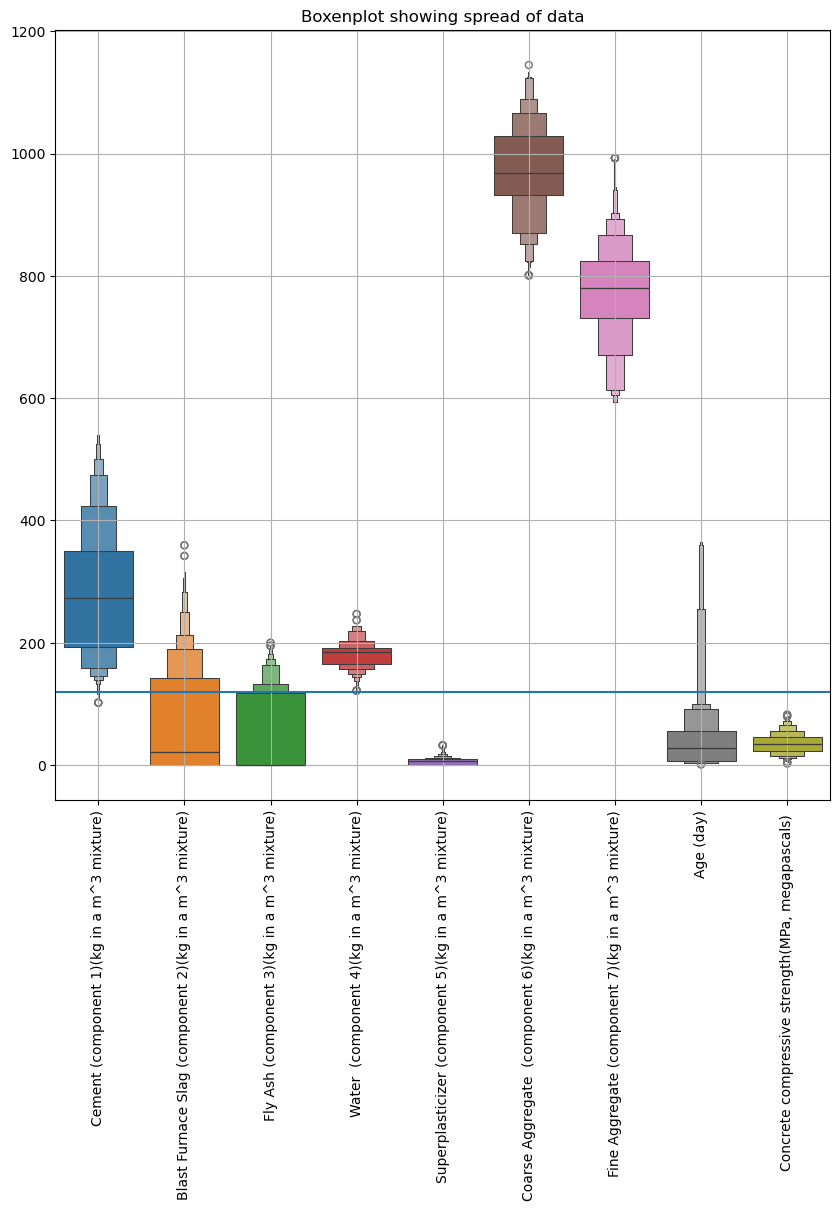

In [12]:
plt.figure(figsize = (10,10))
sns.boxenplot(df)
plt.axhline(120)
plt.xticks(rotation = 90)
plt.title('Boxenplot showing spread of data')
plt.grid()
plt.show()

In [ ]:
df['cemen']

Text(0.5, 1.0, 'Heatmap showing Correlation w.r.t Target Column')

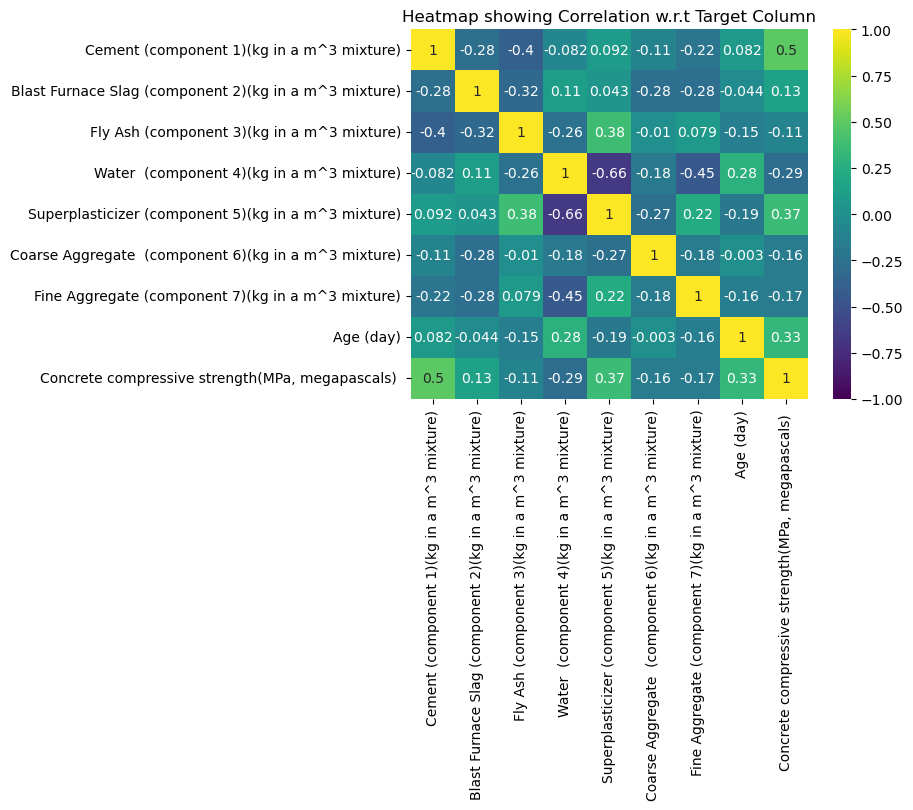

In [13]:
sns.heatmap(df.corr(),annot=True,center=0,vmax =1,vmin=-1,cmap='viridis')
plt.title('Heatmap showing Correlation w.r.t Target Column')

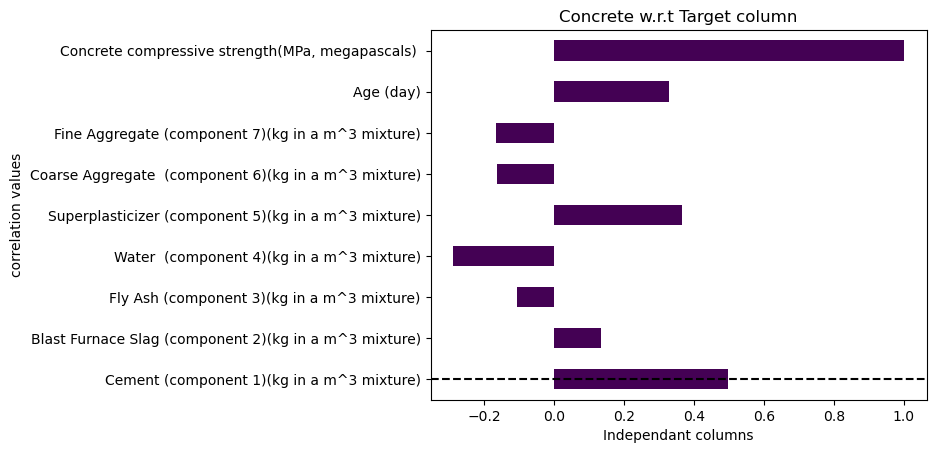

In [14]:
df.corr()['Concrete compressive strength(MPa, megapascals) '].plot(kind = 'barh',cmap = 'viridis')
plt.axhline(0,linestyle = '--' ,color = 'black')
plt.title('Concrete w.r.t Target column')
plt.ylabel('correlation values')
plt.xlabel('Independant columns')
plt.show()

In [15]:
# cheking top 5 rows of dataset
'''
1.as the dataset contain no categorical columns, here no need of converting categorical colunms to numrical colunms
2. no misssing values present in the given dataset
'''
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [16]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [17]:
# preventing data leackege

# step 1 : spilt the datset into X and Y
# where X : indepentent cloumns and y: dependent columns: target column
X = df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ',axis = 1)
y = df['Concrete compressive strength(MPa, megapascals) ']

# step 2: using Train Test split
# test_size lies between 0.20 to 0.35
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state= 42)

# step 3 : using scaling technique
sc = MinMaxScaler()

#seen Data 
X_train = sc.fit_transform(X_train)
#unseen data
X_test = sc.transform(X_test)




In [18]:
X_train.max(),X_train.min()

(1.0000000000000002, 0.0)

In [19]:
# linear regression

from sklearn.linear_model import LinearRegression
# fit model is always on traing or seen dataset 
LR = LinearRegression().fit(X_train,y_train)
# prediction values are based on unseen data i.e. test data
y_pred_LR = LR.predict(X_test)
# y_test actual valye and y_perd_lr : predicted value
print('Model Accurary for Linear Regression',r2_score(y_test,y_pred_LR))

Model Accurary for Linear Regression 0.5943782479239215


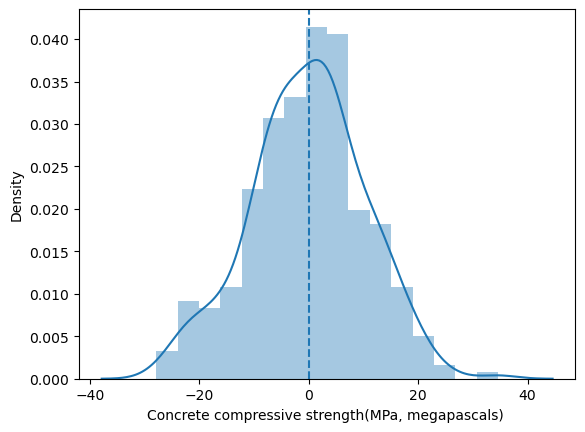

In [20]:
sns.distplot(y_test-y_pred_LR)  # dictrubution plot
plt.axvline(0,linestyle = '--')

Text(0, 0.5, 'y_pred')

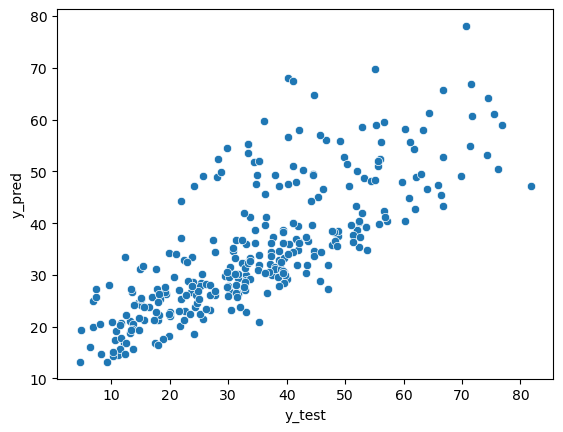

In [21]:
sns.scatterplot(x =y_test, y=y_pred_LR)
plt.xlabel('y_test')
plt.ylabel('y_pred')

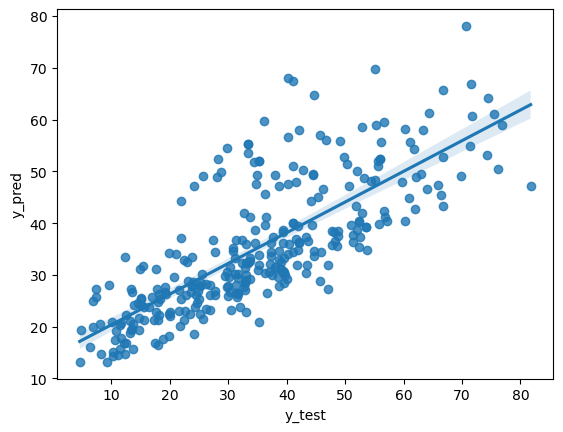

In [22]:
sns.regplot(x =y_test, y=y_pred_LR)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [23]:
# evaluate coefficient
LR.coef_

array([ 54.95342731,  41.97459796,  17.55268553, -11.34057972,
        12.76701497,   9.66978699,  14.4992847 ,  41.47485093])

In [24]:
#Evaluate constant value 
LR.intercept_

-13.616932642237423

In [25]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

print('the model accuarcy for Decision Tree Regressor',r2_score(y_test,y_pred_DT))

the model accuarcy for Decision Tree Regressor 0.8206776369055766


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

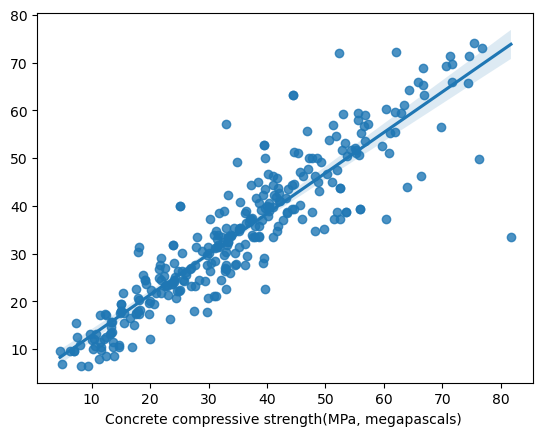

In [26]:
sns.regplot(x = y_test, y = y_pred_DT)

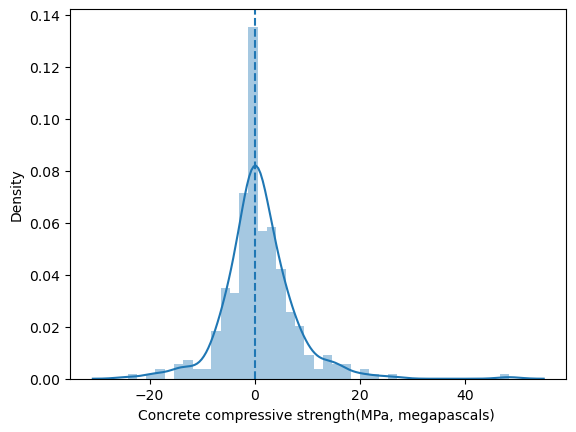

In [27]:
sns.distplot(y_test - y_pred_DT)
plt.axvline(0,linestyle = '--')

In [28]:
# Random forest Regressor
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor().fit(X_train,y_train) 
y_pred_RF = RF.predict(X_test)

print('model accury for  RandomForestRegressor',r2_score(y_test,y_pred_RF))

model accury for  RandomForestRegressor 0.8887313197732749


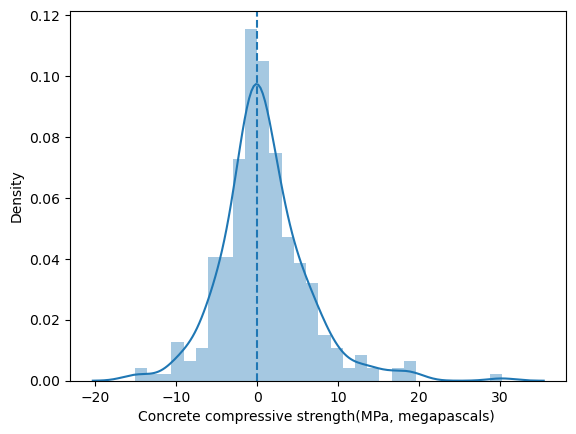

In [29]:
sns.distplot(y_test-y_pred_RF)
plt.axvline(0,linestyle = "--")

In [30]:
df.columns


Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [31]:
RF.feature_importances_

array([0.33338875, 0.07416277, 0.02026928, 0.11790322, 0.06311614,
       0.02490931, 0.0369087 , 0.32934182])

In [32]:
features = RF.feature_importances_

In [33]:
feature_names = X.columns
importance_df = pd.Series(features, index = feature_names)
importance_df

Cement (component 1)(kg in a m^3 mixture)                0.333389
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.074163
Fly Ash (component 3)(kg in a m^3 mixture)               0.020269
Water  (component 4)(kg in a m^3 mixture)                0.117903
Superplasticizer (component 5)(kg in a m^3 mixture)      0.063116
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.024909
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.036909
Age (day)                                                0.329342
dtype: float64

In [34]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [35]:
# using Xgboost Algorithm
import xgboost as xg

xgb = xg.XGBRegressor().fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
print('model accurcy for XGBoost regressor',r2_score(y_test,y_pred_xgb))

model accurcy for XGBoost regressor 0.9104444067517969


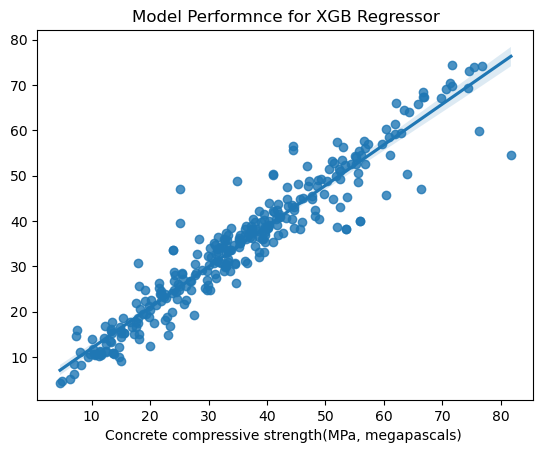

In [36]:
# model performance for xgb
sns.regplot(x = y_test,y = y_pred_xgb)
plt.title('Model Performnce for XGB Regressor')
plt.show()

In [37]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor().fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)
print('model accurcy for AdaBoost regressor',r2_score(y_test,y_pred_ada))

model accurcy for AdaBoost regressor 0.7858105892495372


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
GRE = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_GRE = GRE.predict(X_test)
print('model accurcy for GradientBoostingRegressor',r2_score(y_test,y_pred_GRE))

model accurcy for GradientBoostingRegressor 0.8911488127434553


In [39]:
# KNN ALGORITHM
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor().fit(X_train,y_train)
y_pred_KNN = KNN.predict(X_test)
print('model accurcy for KNeighborsRegressor',r2_score(y_test,y_pred_KNN))

model accurcy for KNeighborsRegressor 0.6457281524418169


In [43]:
from sklearn.model_selection import RandomizedSearchCV

#initialize the model
RF = RandomForestRegressor(random_state=42)

# define hyperparameter grid
param_dist = {
    'n_estimators' : [100,200,300,500],
    'max_depth' : [None,10,20,30],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'max_features': ['auto','sprt','log2']
}

#RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator= RF,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

#fit to trainig data
random_search.fit(X_train,y_train)

#best model
best_rf = random_search.best_estimator_
print('Best parameter:', random_search.best_params_)
print('Best R2 score on CV:', random_search.best_score_)

Best parameter: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best R2 score on CV: 0.8932331477435091
